# Simulación

## Modelo A
### Paso 1

Ecuaciones empleadas:
$$\frac{\mu}{\rho} = \sigma\frac{N_A}{w} = \sigma n$$

$$\mu = \frac{\mu}{\rho}\rho$$
$\frac{\mu}{\rho}$ es un valor conocido tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

In [22]:
# Simulación de una particula que entra a un detector de NaI de 3x3x3 in^3
import numpy as np
import matplotlib.pyplot as plt

# Datos del detector
t = 3 # in Longitud del detector
t = t*2.54 # cm

# Datos del NaI tomados de 

rho = 3.7 # g/cm^3 Densidad del NaI
N_A = 6.022e23 # Numero de Avogadro
w = 150 # g/mol Peso molecular del NaI

r_e = 2.81794e-13 # cm Radio clasico del electron
m_e = 511 # keV Masa del electron


E = 662; # keV

# Coeficiente masico de atenuacion g^-1 cm^2 para NaI a 662 keV con dispersión coherente
mu_rho = 7.395e-2 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

mu = mu_rho*rho # Coeficiente de atenuacion cm^-1


# frecuencia P

p_int = 1-np.exp(-mu*t)
p_no_int = np.exp(-mu*t)

pdf1 = np.array([p_no_int,p_int])
cdf1 = np.cumsum(pdf1)

interaccion = [False,True]

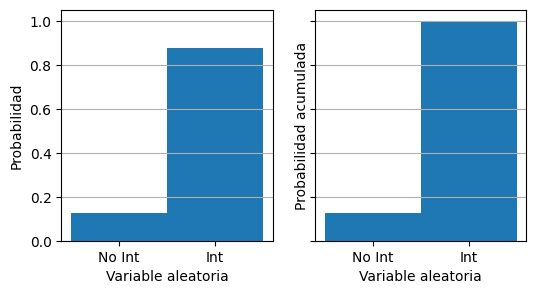

In [23]:
# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada
fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5], pdf1, width=1, align='center')
axs[0].set_xticks([0.5, 1.5])
axs[0].set_xticklabels(['No Int', 'Int'])
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Variable aleatoria')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5], cdf1, width=1, align='center')
axs[1].set_xticks([0.5, 1.5])
axs[1].set_xticklabels(['No Int', 'Int'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Variable aleatoria')
axs[1].grid(axis='y')

plt.show()


### Paso 2

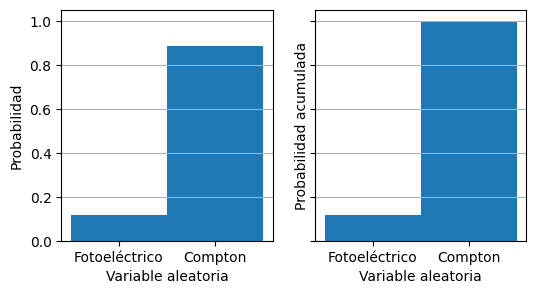

In [24]:
# Absorcion fotoelectrica g^-1 cm^2 para NaI a 662 keV
mu_f_rho = 8.544e-3 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand 
#mu_c_rho = 6.540e-2 # Tomado de NIST https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand
#mu/rho = 7.662E-02
#mu_f/rho = 8.544E-03
#mu_c/rho = 6.540E-02
mu_f = mu_f_rho*rho # Coeficiente de atenuacion cm^-1
#mu_c = mu_c_rho*rho # Coeficiente de atenuacion cm^-1
mu_c = mu-mu_f


p_f = mu_f/mu # Probabilidad de absorcion fotoelectrica
p_c = mu_c/mu # Probabilidad de absorcion compton

pdf2 = np.array([p_f,p_c])
cdf2 = np.cumsum(pdf2)
compton = [False,True]

# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada

fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5], pdf2, width=1, align='center')
axs[0].set_xticks([0.5, 1.5])
axs[0].set_xticklabels(['Fotoeléctrico', 'Compton'])
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Variable aleatoria')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5], cdf2, width=1, align='center')
axs[1].set_xticks([0.5, 1.5])
axs[1].set_xticklabels(['Fotoeléctrico', 'Compton'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Variable aleatoria')
axs[1].grid(axis='y')

plt.show()




In [25]:
p_nc1 = np.exp(-mu_c*t)
p_nf1 = np.exp(-mu_f*t)
p_ni = np.exp(-mu*t)
p_ni1 = p_nc1+p_nf1
p_c1 = (1-p_ni)*p_nc1
p_f1 = (1-p_ni)*p_nf1
p_int = p_c1+p_f1


print(f"Compton: {p_c1}",f"Fotoelectrico: {p_f1}",f"Int: {p_int}",f"No Int: {p_ni1}",sep="\n")


Compton: 0.13851118057804113
Fotoelectrico: 0.688226691116558
Int: 0.8267378716945991
No Int: 0.9441028847729069


### Paso 3
En la ejecución de simulación
### Paso 4

$$\epsilon_e = \frac{E_e}{E_{\gamma}}$$
$$\epsilon_{\gamma} = \frac{E_{\gamma}}{m_e c^2}$$

$$E_e = E_{\gamma}\frac{\epsilon_\gamma(1-\cos\theta)}{1+\epsilon_\gamma(1-\cos\theta)}$$

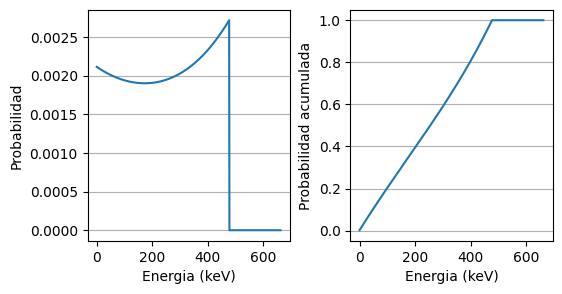

In [26]:
canal = np.arange(0, E+1, 1) # Canal del espectro

#Calibración de canal energia
a_1 = 1 # keV/Canal
a_0 = 0 # keV
energia_cf3 = a_1*canal + a_0 # keV
theta = np.arange(0, np.pi, np.pi/(E+1)) # Angulo de dispersion

e_g = E/511 # Energia de la particula en unidades de masa electronica
cte = e_g*(1-np.cos(theta))
e_e = cte/(1+cte) # Energia de la particula despues de la dispersion
e_e = energia_cf3/E # Energia de la particula despues de la dispersion

Ec = E*2*e_g/(1+2*e_g) # Energia de borde Compton

# Funcion de distribucion de probabilidad de la energia de la particula despues de la dispersion

dsdE = np.pi*r_e**2/(m_e*e_g**2)*(2+((e_e**2)/(e_g**2/(1+e_e)**2))+e_e/(1+e_e)*(e_e-2/e_g))
dsdE_chopped = [0 if i >= Ec else j for i,j in zip(energia_cf3,dsdE)]
pdf3 = dsdE_chopped/np.sum(dsdE_chopped)

# Funcion de distribucion acumulada de la energia de la particula despues de la dispersion

cdf3 = np.cumsum(pdf3)

# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada

fig, axs = plt.subplots(1, 2, figsize=(6,3))

axs[0].plot(energia_cf3, pdf3)
axs[0].set_ylabel('Probabilidad')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energia_cf3, cdf3)
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(wspace=0.3)
plt.show()





### Paso 5

In [27]:
# Simulación de fotopico en distribución gaussiana

def simulacion_fotopico(mu, FWHN=None, sigma=None):
    if FWHN is not None and sigma is not None:
        print('Error: Debe ingresar solo un valor de FWHN o sigma')
        return
    elif FWHN is None and sigma is None:
        return mu
    elif FWHN is not None:
        sigma = FWHN/2.35

    return np.random.normal(mu, sigma, 1)


Función para la rutina de simulación

In [28]:
# Simulación de interacción del foton con el detector

def simulacion_interaccion_FWHN(e_gamma, energias, FWHN):
    rnd1 = np.random.rand(1)
    idx = np.searchsorted(cdf1, rnd1)[0]
    if interaccion[idx]:
        rnd2 = np.random.rand(1)
        jdx = np.searchsorted(cdf2, rnd2)[0]
        if compton[jdx]:
            rnd3 = np.random.rand(1)
            kdx = np.searchsorted(cdf3, rnd3)[0]
            index = np.searchsorted(energias,energia_cf3[kdx])
            if index == len(energias):
                index = index-1
            return simulacion_fotopico(energias[index], FWHN[index])
        else:
            ldx = np.searchsorted(energias,e_gamma)
            if ldx == len(energias):
                ldx = ldx-1
            return simulacion_fotopico(e_gamma, FWHN[ldx])
    else:
        return 0
    
def simulacion_interaccion(e_gamma, energias):
    rnd1 = np.random.rand(1)
    idx = np.searchsorted(cdf1, rnd1)[0]
    if interaccion[idx]:
        rnd2 = np.random.rand(1)
        jdx = np.searchsorted(cdf2, rnd2)[0]
        if compton[jdx]:
            rnd3 = np.random.rand(1)
            kdx = np.searchsorted(cdf3, rnd3)[0]
            index = np.searchsorted(energias,energia_cf3[kdx])
            if index == len(energias):
                index = index-1
            return simulacion_fotopico(energias[index])
        else:
            return simulacion_fotopico(e_gamma)
    else:
        return 0

In [29]:
 
def simulacion_interaccion_A(e_gamma, energias, FWHN=None):
    rnd1 = np.random.rand(1)
    idx = np.searchsorted(cdf1, rnd1)[0]
    if interaccion[idx]:
        rnd2 = np.random.rand(1)
        jdx = np.searchsorted(cdf2, rnd2)[0]
        if compton[jdx]:
            rnd3 = np.random.rand(1)
            kdx = np.searchsorted(cdf3, rnd3)[0]
            index = np.searchsorted(energias,energia_cf3[kdx])
            if index == len(energias):
                index = index-1
            if FWHN is not None:
                return simulacion_fotopico(energias[index], FWHN[index])
            else:
                return simulacion_fotopico(energias[index])
        else:
            if FWHN is not None:
                ldx = np.searchsorted(energias,e_gamma)
                if ldx == len(energias):
                    ldx = ldx-1
                return simulacion_fotopico(e_gamma, FWHN[ldx])
            else:
                return simulacion_fotopico(e_gamma)
    else:
        return 0

Ejecución rutina de simulación

In [30]:
# Simulación de espectro
def simulacion(N, e_gamma, energias, FWHN=None):
    e_detectada = np.zeros(len(energias))
    e = 0
    for i in range(int(N)):
        e = simulacion_interaccion_A(e_gamma, energias, FWHN)
        if e > 0:
            idx = np.searchsorted(energias, e)
            if idx < len(energias):
                e_detectada[idx] += 1
    return e_detectada

### Punto 5 y 6 Modelo A

In [31]:
# Calibración de canal energia
a_0 = 0 # keV
a_1 = 1 # keV/Canal
max_canal = 1000 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesA1 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasA1 = a_1*canalesA1 + a_0 # Energia del espectro
FWHN = 1.8727*np.sqrt(energiasA1)-7.9276 # FWHN del espectro para cada energia
FWHN = [0.1 if i <= 0 else i for i,j in zip(FWHN,energiasA1)] # FWHN no puede ser negativo


In [47]:
N = 1e6 # Numero de fotones
e_detec_A_1 = simulacion(N, E, energiasA1)
e_detec_A_2 = simulacion(N, E, energiasA1, FWHN)

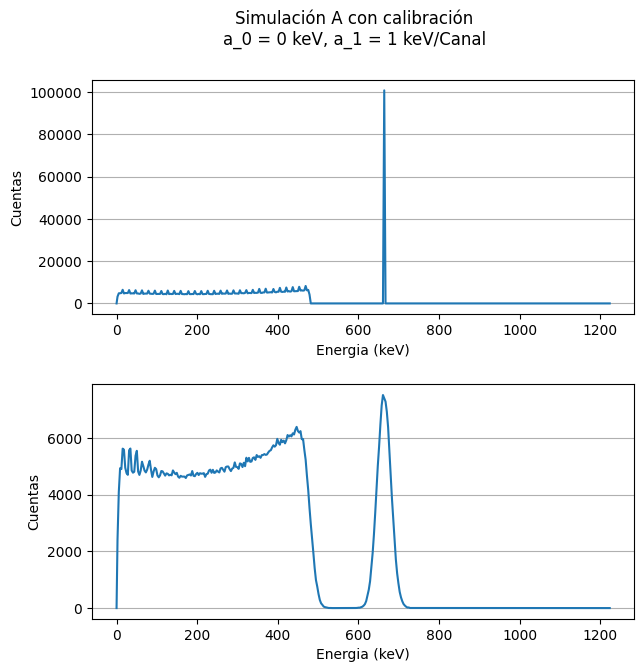

In [48]:

# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasA1, e_detec_A_1)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasA1, e_detec_A_2)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación A con calibración\na_0 = 0 keV, a_1 = 1 keV/Canal')
plt.show()




### Punto 7 Modelo A


In [49]:
# Calibración de canal energia
#Resultados de los parametros de la recta de ajuste:
#a0 (keV)	        a1(keV/canal)
#-55.19 +/- 3.26	3.20 +/- 0.01
a_0 = -55.1872 # keV
a_1 = 3.1969 # keV/Canal
max_canal = 400 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesA3 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasA3 = [0 if i <= -a_0/a_1 else a_1*i+a_0 for i in canalesA3] # Energia no puede ser negativo
FWHN = 1.8727*np.sqrt(energiasA3)-7.9276 # FWHN del espectro para cada energia
FWHN = [0.1 if i <= 0 else i for i,j in zip(FWHN,energiasA3)] # FWHN no puede ser negativo


In [50]:
e_detec_A_3 = simulacion(N, E, energiasA3)
e_detec_A_4 = simulacion(N, E, energiasA3, FWHN)

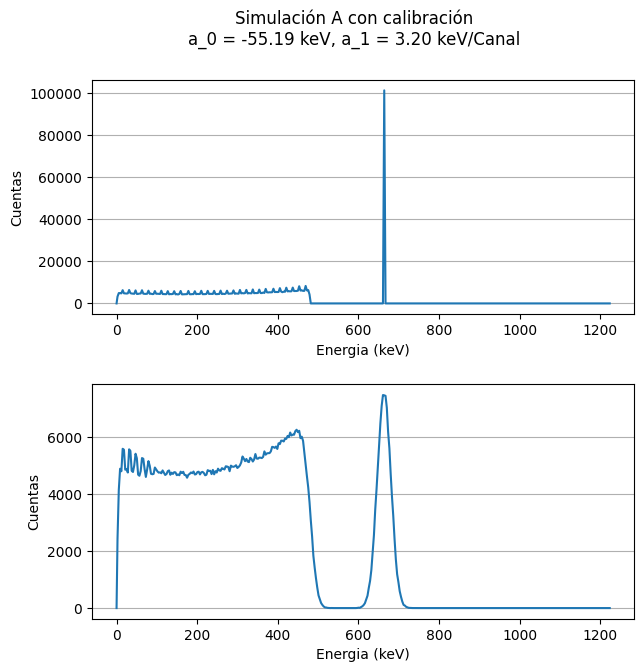

In [51]:
# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasA3, e_detec_A_3)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasA3, e_detec_A_4)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación A con calibración\na_0 = -55.19 keV, a_1 = 3.20 keV/Canal')
plt.show()




## Modelo B

In [52]:
mu_f =(8.544E-03)*rho
mu_c = (6.540E-02)*rho

p_c = 0.5-(0.5)*np.exp(-mu_c*t)
p_f = 0.5-(0.5)*np.exp(-mu_f*t)
p_0= (np.exp(-mu_f*t) + np.exp(-mu_c*t))*0.5

pdf4 = np.array([p_f,p_c,p_0])
cdf4 = np.cumsum(pdf4)

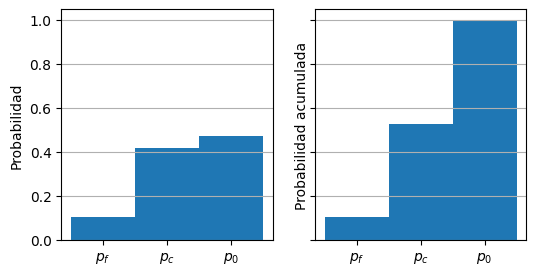

In [53]:
# Grafica de la distribucion de probabilidad y la funcion de distribucion acumulada
fig, axs = plt.subplots(1, 2, figsize=(6,3), sharey=True)

axs[0].bar([0.5, 1.5,2.5], pdf4, width=1, align='center')
axs[0].set_xticks([0.5, 1.5,2.5])
axs[0].set_xticklabels([r'$p_{f}$', r'$p_{c}$',  r'$p_{0}$'])
axs[0].set_ylabel('Probabilidad')
axs[0].grid(axis='y')

axs[1].bar([0.5, 1.5,2.5], cdf4, width=1, align='center')
axs[1].set_xticks([0.5, 1.5,2.5])
axs[1].set_xticklabels([r'$p_{f}$', r'$p_{c}$',  r'$p_{0}$'])
axs[1].set_ylabel('Probabilidad acumulada')
axs[1].grid(axis='y')

plt.show()

In [54]:
def simulacion_interaccion_B (e_gamma, energias, FWHN=None):
    rnd1 = np.random.rand(1)
    idx = np.searchsorted(cdf4, rnd1)[0]
    if idx == 0:
        if FWHN is not None:
            ldx = np.searchsorted(energias,e_gamma)
            if ldx == len(energias):
                ldx = ldx-1
            return simulacion_fotopico(e_gamma, FWHN[ldx])
        else:
            return simulacion_fotopico(e_gamma)
    elif idx == 1:
        rnd2 = np.random.rand(1)
        jdx = np.searchsorted(cdf3, rnd2)[0]
        index = np.searchsorted(energias,energia_cf3[jdx])
        if FWHN is not None:
            return simulacion_fotopico(energias[index], FWHN[index])
        else:
            return simulacion_fotopico(energias[index])
    else:
        return 0


In [55]:
def simulacion_B(N, e_gamma, energias, FWHN=None):
    e_detectada = np.zeros(len(energias))
    e = 0
    for i in range(int(N)):
        e = simulacion_interaccion_B(e_gamma, energias, FWHN)
        if e > 0:
            idx = np.searchsorted(energias, e)
            if idx < len(energias):
                e_detectada[idx] += 1
    return e_detectada

### Punto 5 y 6 modelo B

In [56]:
# Calibración de canal energia
a_0 = 0 # keV
a_1 = 1 # keV/Canal
max_canal = 1000 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesB1 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasB1 = a_1*canalesB1 + a_0 # Energia del espectro
FWHN = 1.8727*np.sqrt(energiasB1)-7.9276 # FWHN del espectro para cada energia
FWHN = [0.1 if i <= 0 else i for i,j in zip(FWHN,energiasB1)] # FWHN no puede ser negativo


In [57]:
e_detec_B_1 = simulacion_B(N, E, energiasB1)
e_detec_B_2 = simulacion_B(N, E, energiasB1, FWHN)

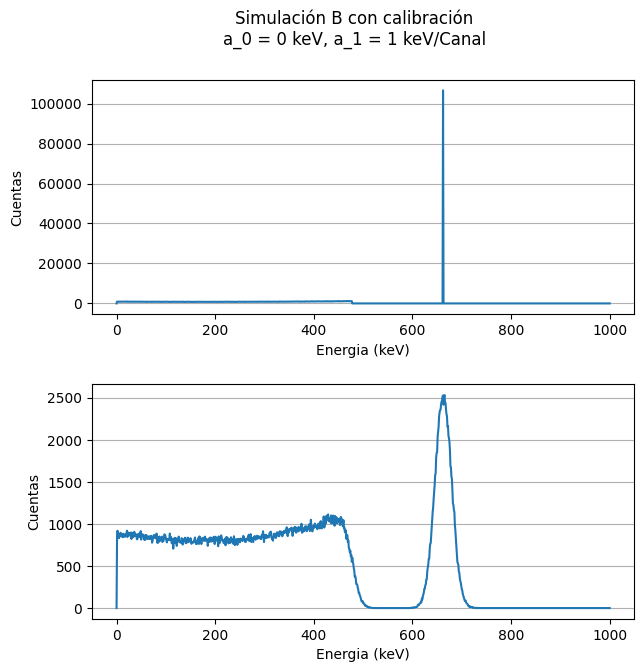

In [58]:
# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasB1, e_detec_B_1)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasB1, e_detec_B_2)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación B con calibración\na_0 = 0 keV, a_1 = 1 keV/Canal')
plt.show()

### Punto 7 Modelo B

In [59]:
# Calibración de canal energia
#Resultados de los parametros de la recta de ajuste:
#a0 (keV)	        a1(keV/canal)
#-55.19 +/- 3.26	3.20 +/- 0.01
a_0 = -55.1872 # keV
a_1 = 3.1969 # keV/Canal
max_canal = 400 # Canal maximo
E_max = a_1*max_canal + a_0 # Energia maxima
canalesB2 = np.arange(0, max_canal+1, 1) # Canal del espectro
energiasB2 = [0 if i <= -a_0/a_1 else a_1*i+a_0 for i in canalesB2] # Energia no puede ser negativo
FWHN = 1.8727*np.sqrt(energiasB2)-7.9276 # FWHN del espectro para cada energia
FWHN = [0.1 if i <= 0 else i for i,j in zip(FWHN,energiasB2)] # FWHN no puede ser negativo


In [60]:
e_detec_B_3 = simulacion_B(N, E, energiasB2)
e_detec_B_4 = simulacion_B(N, E, energiasB2, FWHN)

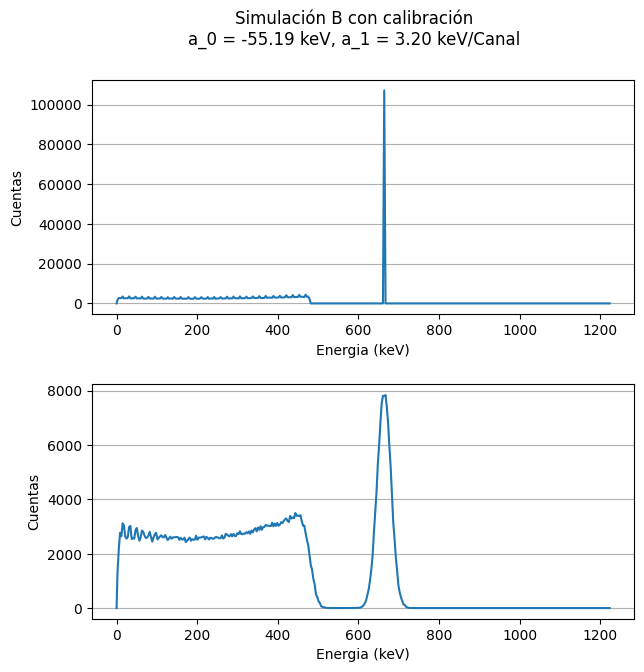

In [61]:
# Grafica del espectro de energia detectada
fig, axs = plt.subplots(2, 1, figsize=(7,7))

axs[0].plot(energiasB2, e_detec_B_3)
axs[0].set_ylabel('Cuentas')
axs[0].set_xlabel('Energia (keV)')
axs[0].grid(axis='y')

axs[1].plot(energiasB2, e_detec_B_4)
axs[1].set_ylabel('Cuentas')
axs[1].set_xlabel('Energia (keV)')
axs[1].grid(axis='y')

fig.subplots_adjust(hspace=0.3)
fig.suptitle('Simulación B con calibración\na_0 = -55.19 keV, a_1 = 3.20 keV/Canal')
plt.show()

In [ ]:
# Export data to text files
np.savetxt('e_detect_A_1.txt', np.column_stack((canalesA1, energiasA1, e_detec_A_1)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_A_2.txt', np.column_stack((canalesA1, energiasA1, e_detec_A_2)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_A_3.txt', np.column_stack((canalesA3, energiasA3, e_detec_A_3)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_A_4.txt', np.column_stack((canalesA3, energiasA3, e_detec_A_4)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_1.txt', np.column_stack((canalesB1, energiasB1, e_detec_B_1)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_2.txt', np.column_stack((canalesB1, energiasB1, e_detec_B_2)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_3.txt', np.column_stack((canalesB2, energiasB2, e_detec_B_3)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
np.savetxt('e_detect_B_4.txt', np.column_stack((canalesB2, energiasB2, e_detec_B_4)), fmt='%d %.2f %.2f', header='Channels Energies Detected_Value', comments='')
